## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## Load the dataset

In [3]:
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\DSA\datasets\cognorise\IRIS.csv')

## Exploratory Data Analysis

In [4]:
#view the first few entries
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Print the number of rows and columns of the dataset
df.shape

(150, 5)

In [6]:
#statistical analysis
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
## Checking the datatypes of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
## count number of missing values
print(df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


There is no missing values in our data

## Data Visualisation

In [11]:
df.value_counts("species")

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

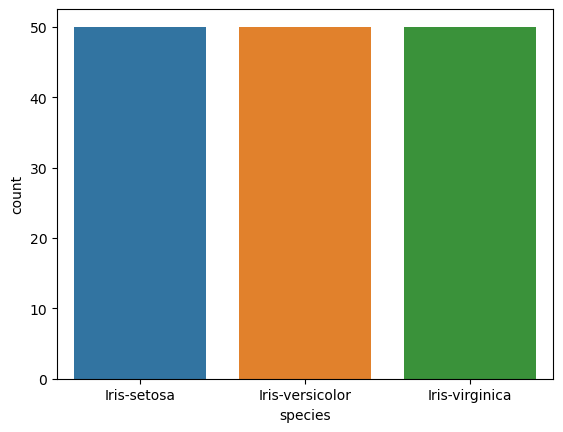

In [12]:
sns.countplot(x='species', data=df, )
plt.show()

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

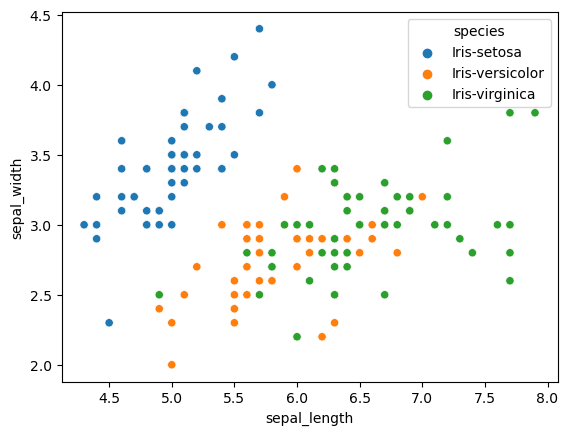

In [14]:
## Comparing sepal length andd sepal width
sns.scatterplot(x='sepal_length', y='sepal_width',hue='species', data=df, )

from the figure, we can analyse that,

1.Iris-setosa has smaller sepal length but larger sepal width.

2.Iris-virginica has larger sepal lengths but smaller sepal widths.

3.Iris-vesicolor lies middle of the two classifications

<Axes: xlabel='petal_length', ylabel='petal_width'>

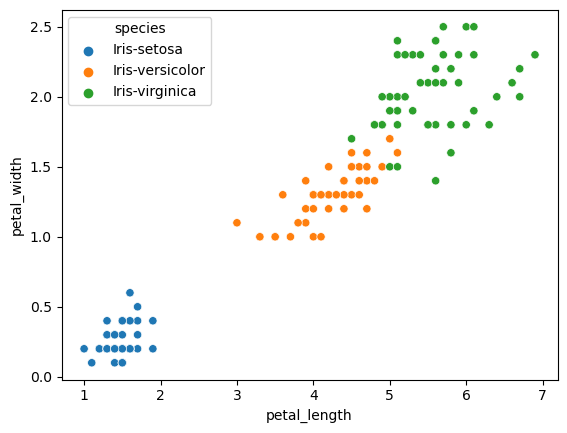

In [16]:
## Comparing petal length and petal width
sns.scatterplot(x='petal_length', y='petal_width',hue='species', data=df, )

From the above figure, we can analyse that,

1.Iris-setosa has smaller petal lengths and width.

2.Iris-virginica has larger petal length and width.

3.Iris-versicolor lies middle of the two classifications.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14320\3237795141.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


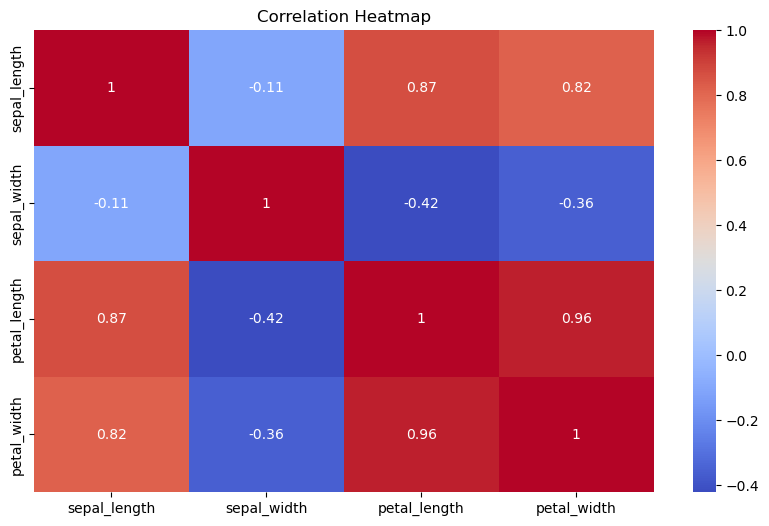

In [17]:
# Correlation heatmap

correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Checking outliers

<Axes: xlabel='sepal_length'>

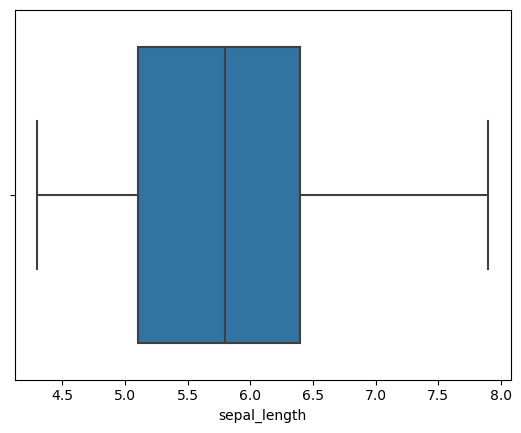

In [18]:
sns.boxplot(x='sepal_length', data=df)

<Axes: xlabel='sepal_width'>

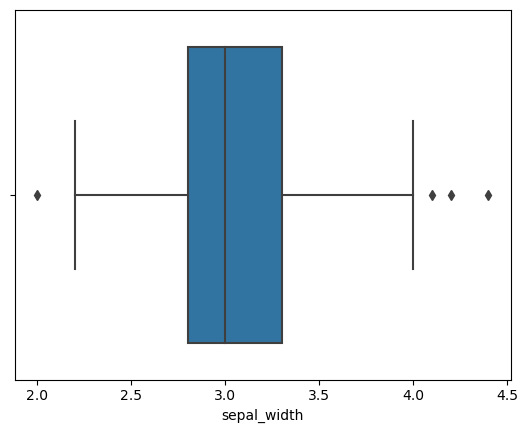

In [19]:
sns.boxplot(x='sepal_width', data=df)

<Axes: xlabel='petal_length'>

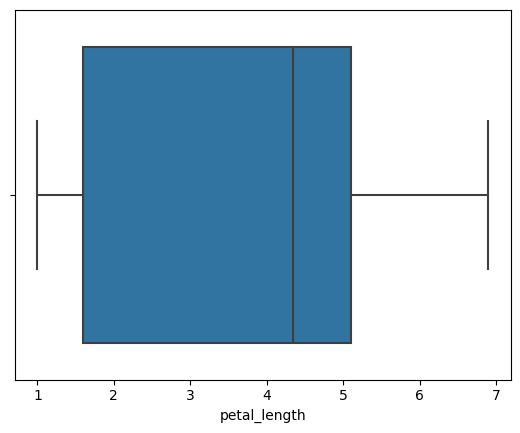

In [20]:
sns.boxplot(x='petal_length', data=df)

<Axes: xlabel='petal_width'>

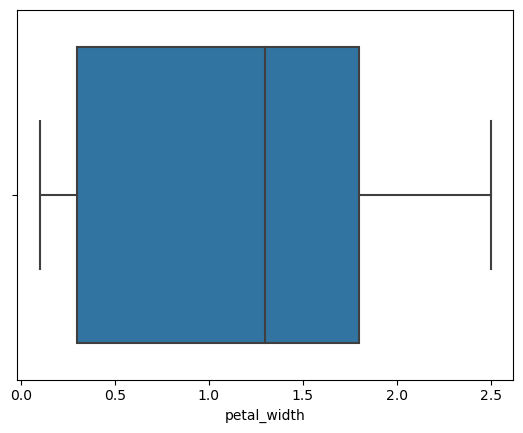

In [21]:
sns.boxplot(x='petal_width', data=df)

## Removing outliers

Old Shape:  (150, 5)
New Shape:  (146, 5)


<Axes: xlabel='sepal_width'>

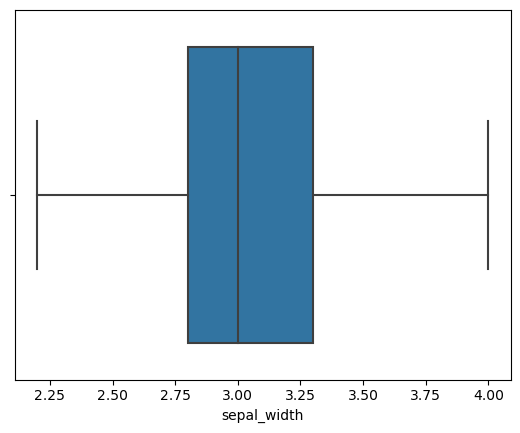

In [22]:
# Calculate the IQR
Q1 = df['sepal_width'].quantile(0.25)
Q3 = df['sepal_width'].quantile(0.75)
IQR = Q3 - Q1

print("Old Shape: ", df.shape)
# Define a threshold for identifying outliers (e.g., 1.5 times the IQR)
threshold = 1.5

# Identify the outliers
# Upper bound
upper = np.where(df['sepal_width'] >= (Q3+1.5*IQR))
 
# Lower bound
lower = np.where(df['sepal_width'] <= (Q1-1.5*IQR))
 
# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)
 
sns.boxplot(x='sepal_width', data=df)

## Data Preprocessing

In [23]:
#Creating dataframe for features
X = df.iloc[:,:-1].values

#Creating dataframe for target
y = df['species']

In [24]:
print(X.shape, y.shape)

(146, 4) (146,)


In [25]:
#Splitting the dataset into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(116, 4) (30, 4) (116,) (30,)


## Feature scaling

In [26]:
# Scale the input features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Building and Evaluation

Using Three models for classification of fraudulent and non-fraudulent transactions:

1.SVM(Support Vector Machine)

2.Decision Tree

2.Random Forest

### 1. SVM Classifier

In [27]:
# Create SVM Classifier
svc_classifier = SVC()

# train the model using the training sets
svc_classifier.fit(X_train_scaled, y_train)

# make predictions on the testing set
svc_predictions = svc_classifier.predict(X_test_scaled)

In [28]:
# evaluate the model
svc_accuracy = accuracy_score(y_test, svc_predictions)
conf_matrix = confusion_matrix(y_test, svc_predictions)
classification_rep = classification_report(y_test, svc_predictions)

print(f'Accuracy: {svc_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.97
Confusion Matrix:
[[12  0  0]
 [ 0  8  0]
 [ 0  1  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



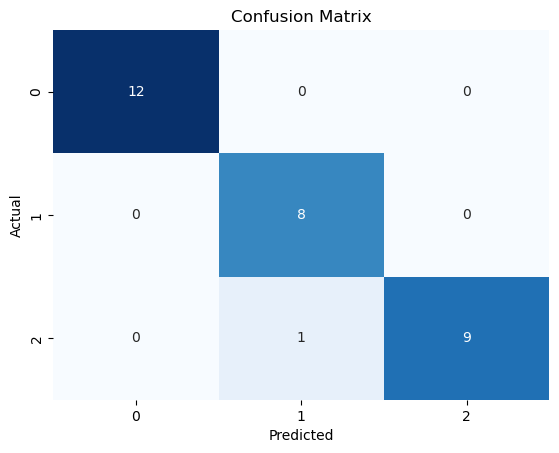

In [29]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 2. Decision Tree Classifier

In [30]:
# Create decision tree Classifier
dt_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# train the model using the training sets
dt_classifier.fit(X_train_scaled, y_train)

# make predictions on the testing set
dt_predictions = dt_classifier.predict(X_test_scaled)

In [31]:
# evaluate the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
conf_matrix = confusion_matrix(y_test, dt_predictions)
classification_rep = classification_report(y_test, dt_predictions)

print(f'Accuracy: {dt_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.93
Confusion Matrix:
[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.93      0.93      0.93        30



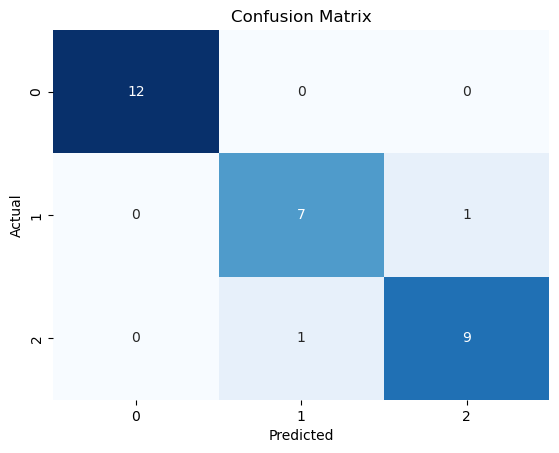

In [32]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 3. Random forest Classifier

In [33]:
# Create Random forest Classifier
rf_classifier = RandomForestClassifier()

# train the model using the training sets
rf_classifier.fit(X_train_scaled, y_train)

# make predictions on the testing set
rf_predictions = rf_classifier.predict(X_test_scaled)

In [34]:
# evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
conf_matrix = confusion_matrix(y_test, rf_predictions)
classification_rep = classification_report(y_test, rf_predictions)

print(f'Accuracy: {rf_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.93
Confusion Matrix:
[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.93      0.93      0.93        30



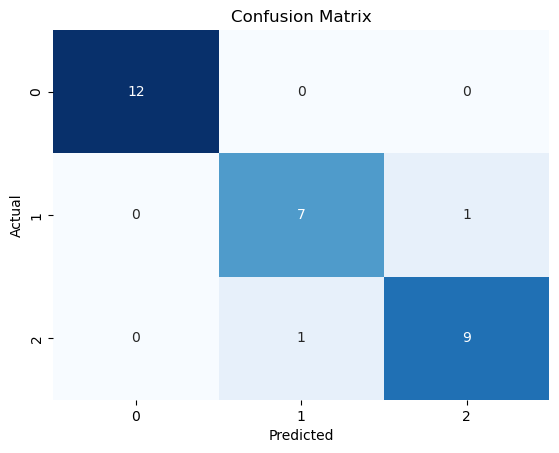

In [35]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Conclusion

In [36]:
print(f'SVM_Accuracy: {svc_accuracy:.2f}')
print(f'Decision tree_Accuracy: {dt_accuracy:.2f}')
print(f'Random forest_Accuracy: {rf_accuracy:.2f}')

SVM_Accuracy: 0.97
Decision tree_Accuracy: 0.93
Random forest_Accuracy: 0.93


The model with best performance is with Support Vector Machine.